In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import warnings 

In [2]:
warnings.filterwarnings("ignore")

#### 1. Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States|

In [34]:
Crime = pd.read_csv("PATH/crime_data.csv")

In [35]:
Crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [27]:
Crime.shape

(50, 5)

In [6]:
# Normalising the data
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
crime_norm = norm_func(Crime.iloc[:,1:])
crime_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


##### Hierarchical Clustering

In [36]:
Crime_Hierar = pd.read_csv("PATH/crime_data.csv")

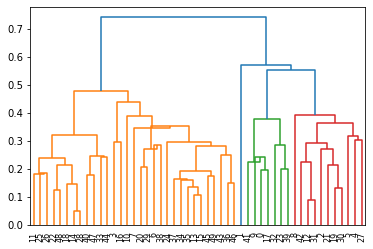

In [37]:
# Creating Dendrogram
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method = "centroid"))

In [38]:
# Creating Clusters
hc = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = "single")

In [39]:
# Saving clusters for chart
y_hc = hc.fit_predict(crime_norm)
Clusters = pd.DataFrame(y_hc, columns = ["Clusters"])


In [40]:
Crime_Hierar["h_clusterid"] = Clusters

In [41]:
Crime_Hierar

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


##### Kmeans

In [42]:
Crime_K = pd.read_csv("PATH/crime_data.csv")

In [76]:
# Normalising data scaler
scaler = StandardScaler()
Crime_norm = scaler.fit_transform(Crime.iloc[:, 1:])

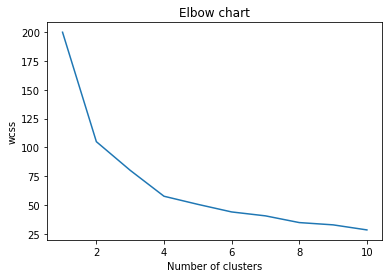

In [46]:
# Finding optimal value for k (Elbow chart)
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(Crime_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Elbow chart")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [54]:
# Building Cluster algorithm using k = 4 
clusters_new = KMeans(4, random_state = 42)
clusters_new.fit(Crime_norm)

KMeans(n_clusters=4, random_state=42)

In [55]:
clusters_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [56]:
# Assign clusters to data set
Crime_K["clusterid_new"] = clusters_new.labels_
Crime_K

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


##### DBScan

In [160]:
Crime_DBS =  pd.read_csv("PATH/crime_data.csv")

In [102]:
Crime_DBS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [151]:
dbscan = DBSCAN(eps = 0.8, min_samples = 2)
dbscan.fit(Crime_norm)

DBSCAN(eps=0.8, min_samples=2)

In [152]:
# Finding noise data points, represented as -1
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  2,  1,  1,  1, -1,
        0,  1,  3, -1,  3,  1,  4, -1,  1,  1, -1,  1, -1,  3,  2, -1,  1,
        1,  1,  5,  1, -1,  4,  1, -1, -1,  5, -1,  1,  5,  1,  1,  1],
      dtype=int64)

In [161]:
cl = pd.DataFrame(dbscan.labels_, columns = ["Clusters"])
Crime_DBS = pd.concat([Crime_DBS, cl], axis = 1)
Crime_DBS

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [58]:
Crime_Hierar.groupby("h_clusterid").agg(["mean"]).reset_index()

,h_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,7.619149,163.87234,65.468085,20.625532
1,1,5.900000,238.00000,72.000000,15.800000
2,2,15.400000,335.00000,80.000000,31.900000
3,3,10.000000,263.00000,48.000000,44.500000


In [59]:
Crime_K.groupby("clusterid_new").agg(["mean"]).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,3.600000,78.538462,52.076923,12.176923


In [162]:
Crime_DBS.groupby("Clusters").agg(["mean"]).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,8.915000,198.100000,69.950000,24.635000
1,0,14.300000,242.500000,62.000000,21.700000
2,1,4.644444,99.222222,59.000000,14.577778
3,2,10.750000,251.500000,84.500000,25.050000
4,3,11.600000,280.000000,70.333333,31.666667
5,4,15.250000,269.000000,46.000000,19.800000
6,5,4.033333,141.333333,73.333333,26.133333


#### 2. Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [62]:
Airlines = pd.read_excel(r"PATH\EastWestAirlines.xlsx", sheet_name = "data") 

In [69]:
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [70]:
Airlines.shape

(3999, 12)

In [72]:
# Normalisingf the data
Scaler = StandardScaler()
Airlines_norm = Scaler.fit_transform(Airlines.iloc[:,1:])

##### Hierarchical Clustering

In [83]:
Airlines_Hierar = pd.read_excel(r"PATH\EastWestAirlines.xlsx", sheet_name = "data")

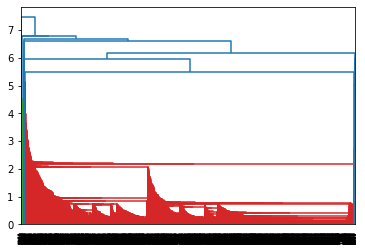

In [78]:
# Creating Dendrogram
dendrogram = sch.dendrogram(sch.linkage(Airlines_norm, method = "single"))

In [80]:
# Creating Clusters
hc = AgglomerativeClustering(n_clusters = 6, affinity = "euclidean", linkage = "single")

In [81]:
# Saving clusters for chart
y_hc = hc.fit_predict(Airlines_norm)
Clusters = pd.DataFrame(y_hc, columns = ["Clusters"])

In [84]:
Airlines_Hierar["h_clusterid"] = Clusters

In [85]:
Airlines_Hierar

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


##### Kmeans

In [86]:
Airlines_K = pd.read_excel(r"PATH\EastWestAirlines.xlsx", sheet_name = "data")

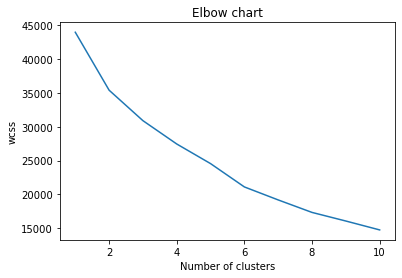

In [88]:
# Finding optimal value for k (Elbow chart)
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(Airlines_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Elbow chart")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [94]:
# Building Cluster algorithm using k = 6 
clusters_new = KMeans(10, random_state = 42)
clusters_new.fit(Airlines_norm)

KMeans(n_clusters=10, random_state=42)

In [95]:
clusters_new.labels_

array([8, 8, 8, ..., 1, 3, 3])

In [96]:
# Assign clusters to data set
Airlines_K["clusterid_new"] = clusters_new.labels_
Airlines_K

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,8
1,2,19244,0,1,1,1,215,2,0,0,6968,0,8
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,8
3,4,14776,0,1,1,1,500,1,0,0,6952,0,8
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3


##### DBScan

In [171]:
Airlines_DBS = pd.read_excel(r"PATH\EastWestAirlines.xlsx", sheet_name = "data")

In [163]:
Airlines_DBS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [174]:
dbscan = DBSCAN(eps = 0.8, min_samples = 8)
dbscan.fit(Airlines_norm)

DBSCAN(eps=0.8, min_samples=8)

In [175]:
# Finding noise data points, represented as -1
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [172]:
cl = pd.DataFrame(dbscan.labels_, columns = ["Clusters"])
Airlines_DBS = pd.concat([Airlines_DBS, cl], axis = 1)
Airlines_DBS

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [93]:
Airlines_Hierar.groupby("h_clusterid").agg(["mean"]).reset_index()

,h_clusterid,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2012.264609,7.305023e+04,145.412092,2.069820,1.0,1.011637,17150.903618,11.506198,449.511763,1.344548,4119.850493,0.369846
1,1,2300.107143,7.779364e+04,0.000000,1.214286,2.0,1.000000,11625.214286,16.785714,523.678571,1.678571,3911.821429,0.392857
2,2,2212.000000,5.223140e+04,66.666667,1.000000,3.0,1.000000,20410.466667,18.933333,692.666667,3.200000,4075.533333,0.400000
3,3,3606.000000,1.601140e+05,500.000000,1.000000,1.0,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.000000
4,4,279.000000,1.704838e+06,0.000000,1.000000,1.0,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.000000
5,5,1313.000000,7.375140e+05,0.000000,3.000000,1.0,4.000000,43993.000000,40.000000,2150.000000,7.000000,5030.000000,0.000000


In [97]:
Airlines_K.groupby("clusterid_new").agg(["mean"]).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1499.141509,91344.301887,87.683019,4.162264,1.000000,1.001887,49966.249057,20.600000,459.669811,1.424528,5053.064151,0.981132
1,1,1972.808344,57382.636245,97.229465,1.625815,1.000000,1.000000,9879.332464,10.067797,420.851369,1.308996,4206.170795,1.000000
2,2,1886.938776,130419.795918,459.551020,2.122449,1.000000,1.000000,31304.234694,29.663265,6801.346939,19.061224,4370.173469,0.765306
3,3,3200.675351,31413.571142,37.382766,1.099198,1.000000,1.000000,2982.880762,5.672345,153.299599,0.453908,1982.786573,0.000000
4,4,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
5,5,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
6,6,2080.963636,116472.400000,5636.345455,2.072727,1.000000,1.000000,19804.290909,12.545455,963.036364,2.890909,3950.636364,0.527273
7,7,1860.109091,109019.472727,16.646281,3.414876,1.000000,1.001653,28706.335537,17.616529,183.021488,0.520661,4407.391736,0.000000
8,8,1151.723798,47469.530210,35.377312,1.113440,1.000000,1.001233,3059.090012,6.082614,179.519112,0.537608,5620.505549,0.000000


In [176]:
Airlines_DBS.groupby("Clusters").agg(["mean"]).reset_index()

,Clusters,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,1755.562500,155680.070175,628.085526,2.657895,1.063596,1.053728,34781.430921,19.776316,1664.748904,4.808114,4622.701754,0.632675
1,0,2195.395786,48626.946862,0.687128,1.609711,1.000000,1.000000,8217.709574,7.972057,81.633532,0.282180,3771.464040,0.000000
2,1,1831.311384,51173.156250,2.232143,2.520089,1.000000,1.000000,20560.545759,12.072545,159.716518,0.546875,4464.292411,1.000000
3,2,2848.250000,43464.000000,0.000000,5.000000,1.000000,1.000000,60008.250000,17.500000,25.000000,0.250000,2637.875000,1.000000
